## Flow around Astoria-like and Barkley-like bathymetries

Look into the velocity fields fron 01_Ast and 03_Bar runs (UPW_8TR and UPW_8Tr_BF are very similar)


In [1]:
import cmocean as cmo
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib as mpl
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

import matplotlib.gridspec as gspec

/home/kramosmu/anaconda3/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
sns.set_context('notebook')
sns.set_style('whitegrid')

In [4]:
gridAst = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_8TR_BF2_AST/01_Ast03/gridGlob.nc')
stAst = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_8TR_BF2_AST/01_Ast03/stateGlob.nc')

gridBar = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_8TR_BF4_BAR/01_Bar03/gridGlob.nc')
stBar = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_8TR_BF4_BAR/01_Bar03/stateGlob.nc')

gridCny = xr.open_dataset('/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc')
stCny = xr.open_dataset('/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc')

## U

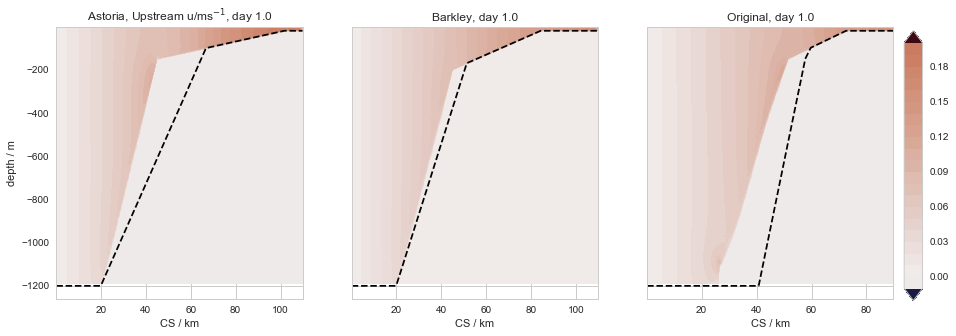

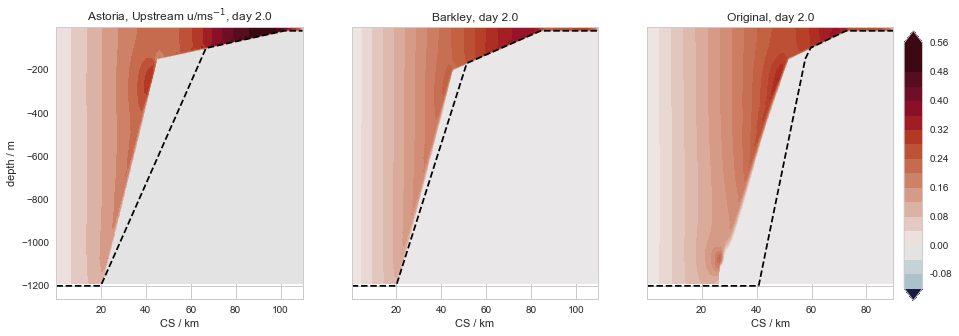

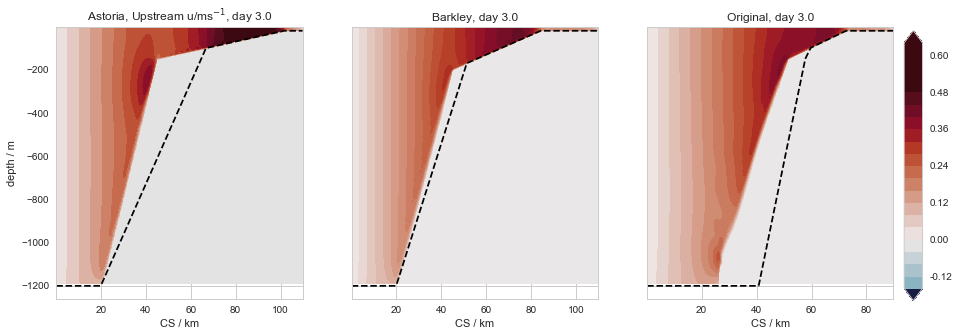

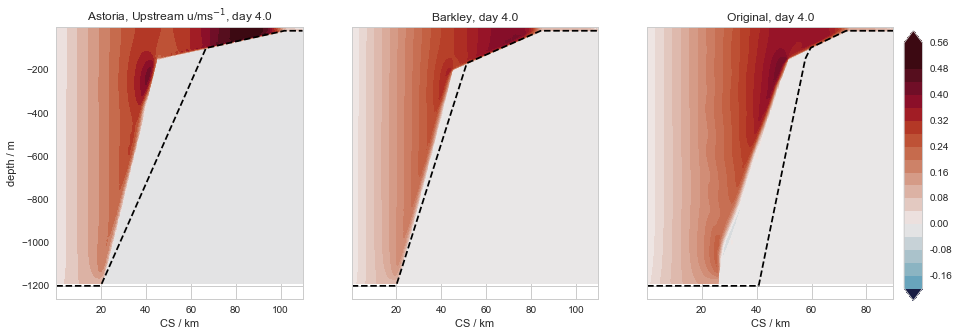

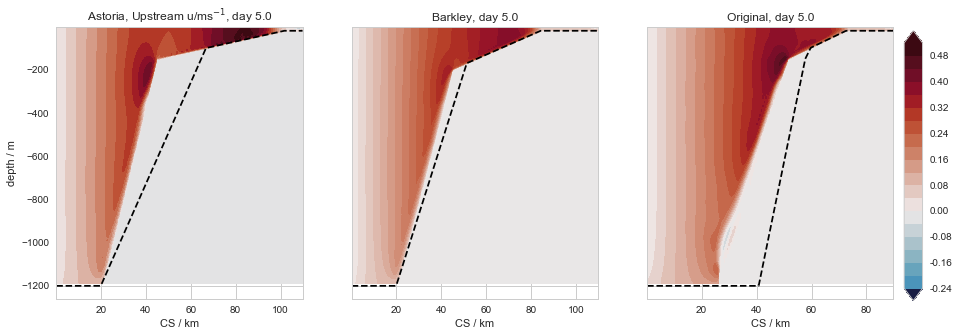

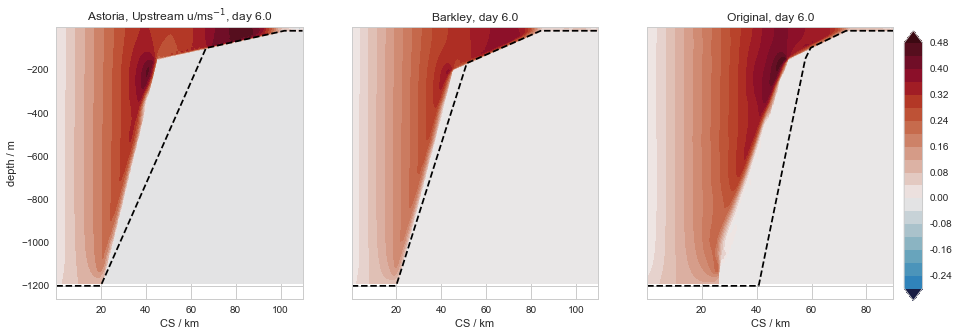

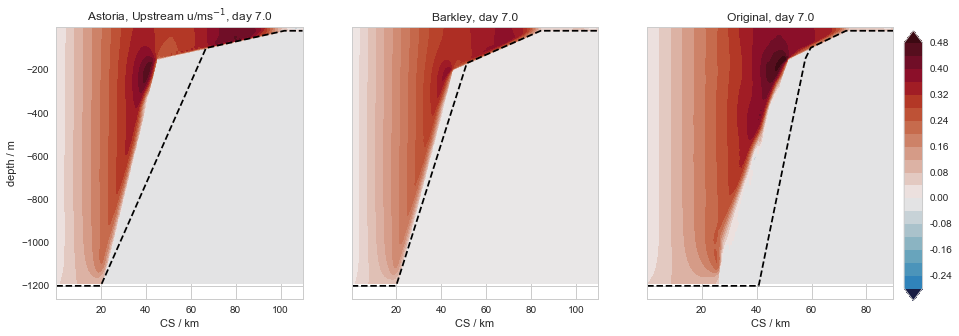

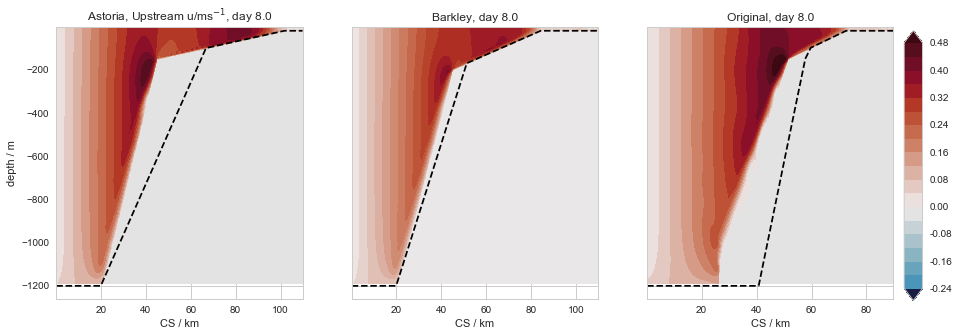

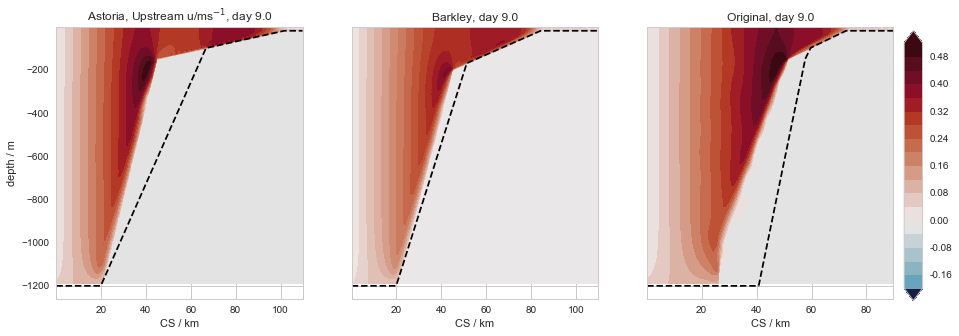

In [5]:
xind = 110
yslice = slice(0,360)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    UAst = stAst.U.isel(T=tt,Xp1=xind,Y=yslice)
    UBar = stBar.U.isel(T=tt,Xp1=xind,Y=yslice)
    UCny = stCny.U.isel(T=tt,Xp1=xind,Y=yslice)

    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh = ax0.contourf(gridAst.Y[yslice]/1000, gridAst.RC, UAst,20, 
                        cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5, extend='both')
    ax0.plot(gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,180],'k--')
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('CS / km')
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')

    ax1.contourf(gridBar.Y[yslice]/1000, gridBar.RC, UBar,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
    ax1.plot(gridBar.Y[yslice]/1000, -gridBar.Depth[yslice,180],'k--')
    ax1.set_xlabel('CS / km')
    
    ax2.contourf(gridCny.Y[yslice]/1000, gridCny.RC, UCny,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
    ax2.plot(gridCny.Y[yslice]/1000, -gridCny.Depth[yslice,180],'k--')
    ax2.set_xlabel('CS / km')
    
    ax0.set_title(r'Astoria, Upstream u/ms$^{-1}$, day %1.1f' %(tt/2))
    ax1.set_title(r'Barkley, day %1.1f' %(tt/2))
    ax2.set_title(r'Original, day %1.1f' %(tt/2))

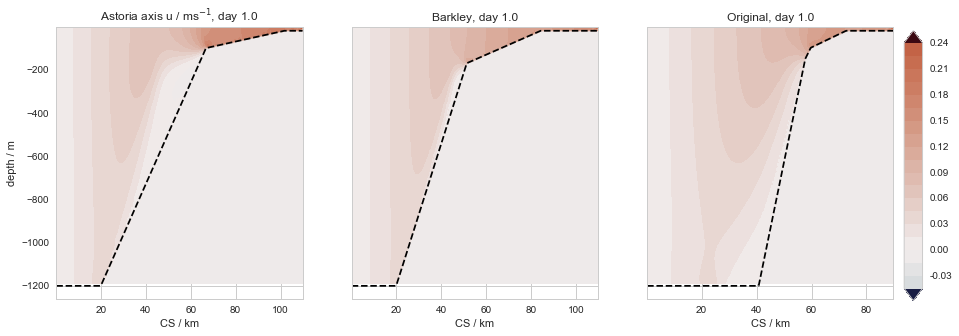

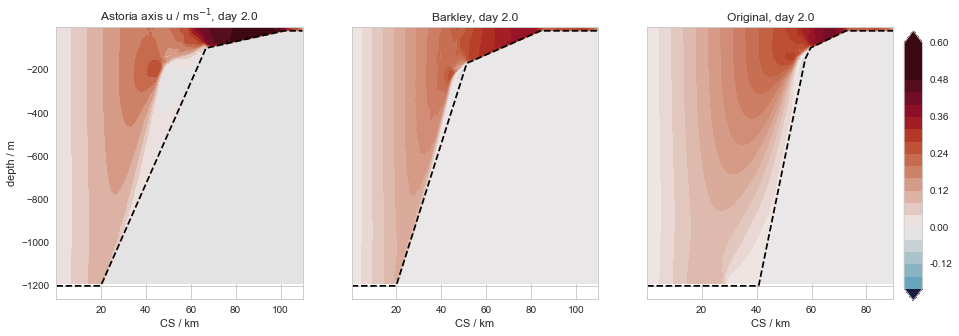

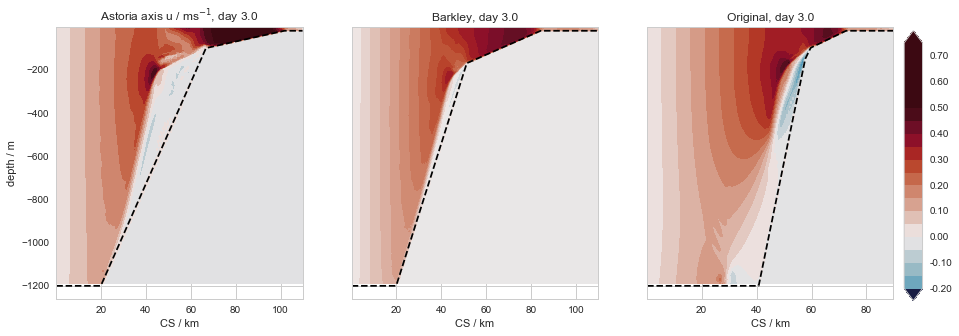

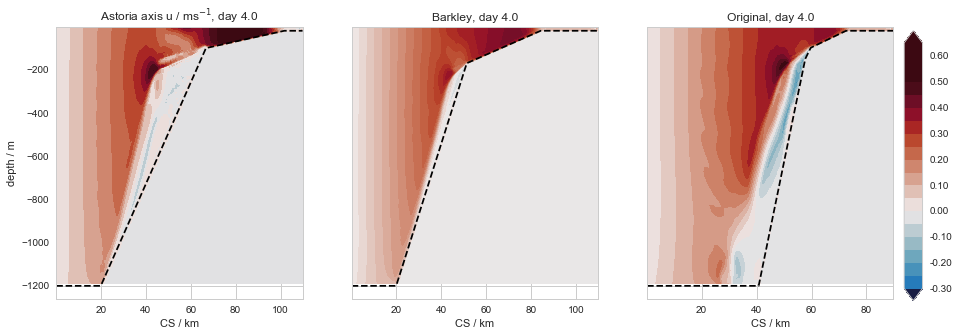

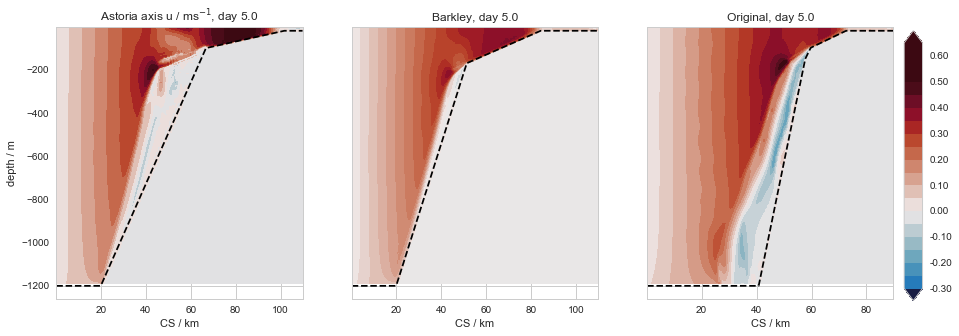

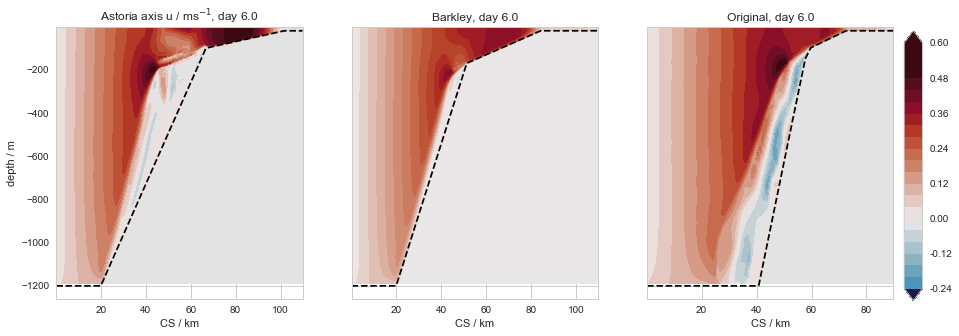

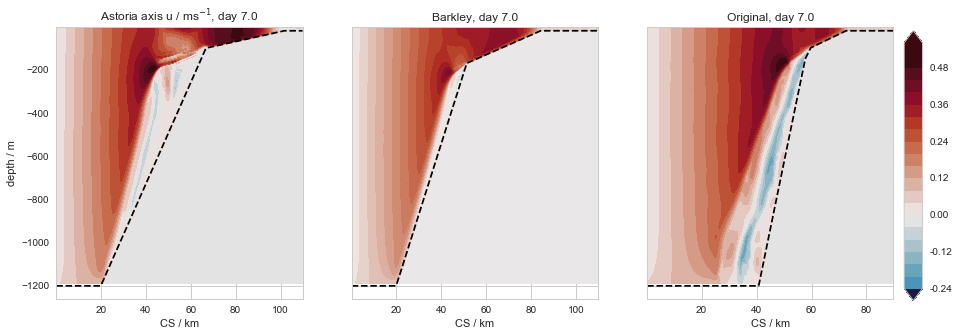

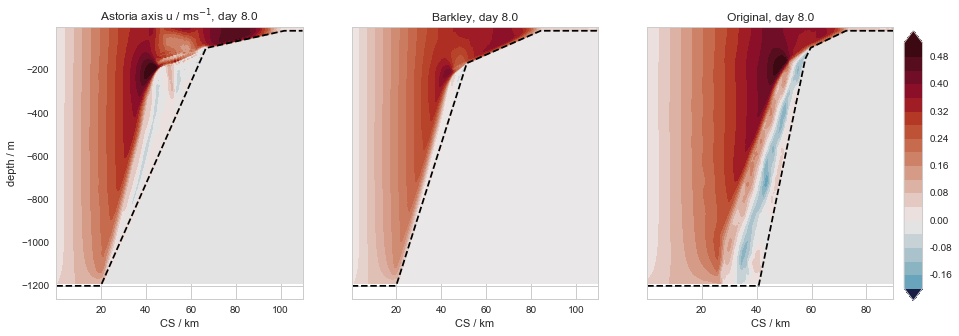

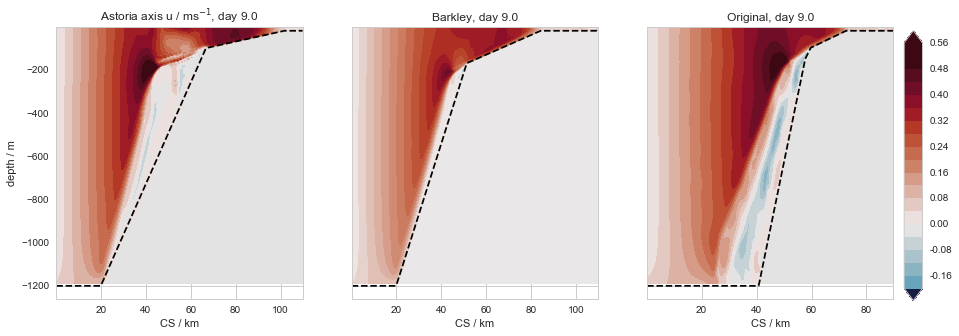

In [6]:
xind = 180
yslice = slice(0,360)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    UAst = stAst.U.isel(T=tt,Xp1=xind,Y=yslice)
    UBar = stBar.U.isel(T=tt,Xp1=xind,Y=yslice)
    UCny = stCny.U.isel(T=tt,Xp1=xind,Y=yslice)

    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh = ax0.contourf(gridAst.Y[yslice]/1000, gridAst.RC, UAst,20, 
                        cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5, extend='both')
    ax0.plot(gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,180],'k--')
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('CS / km')
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')

    ax1.contourf(gridBar.Y[yslice]/1000, gridBar.RC, UBar,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
    ax1.plot(gridBar.Y[yslice]/1000, -gridBar.Depth[yslice,180],'k--')
    ax1.set_xlabel('CS / km')
    
    ax2.contourf(gridCny.Y[yslice]/1000, gridCny.RC, UCny,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
    ax2.plot(gridCny.Y[yslice]/1000, -gridCny.Depth[yslice,180],'k--')
    ax2.set_xlabel('CS / km')
    
    ax0.set_title(r'Astoria axis u / ms$^{-1}$, day %1.1f' %(tt/2))
    ax1.set_title(r'Barkley, day %1.1f' %(tt/2))
    ax2.set_title(r'Original, day %1.1f' %(tt/2))

Text(0.5,1,'Original, advective phase mean')

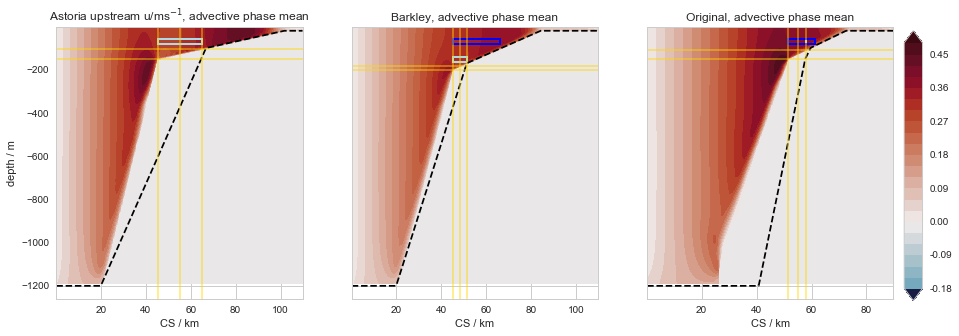

In [14]:
xind = 100
yslice = slice(0,360)
tslice = slice(8,20)
    
UAst = (stAst.U.isel(T=tslice,Xp1=xind,Y=yslice)).mean(dim='T')
UBar = (stBar.U.isel(T=tslice,Xp1=xind,Y=yslice)).mean(dim='T')
UCny = (stCny.U.isel(T=tslice,Xp1=xind,Y=yslice)).mean(dim='T')

fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

mesh = ax0.contourf(gridAst.Y[yslice]/1000, gridAst.RC, UAst,20, 
                    cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5, extend='both')
ax0.plot(gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,180],'k--')
ax0.set_ylabel('depth / m')
ax0.set_xlabel('CS / km')
ax0.axvline(gridAst.Y[230]/1000,color='gold',alpha=0.5)
ax0.axvline(gridAst.Y[182]/1000,color='gold',alpha=0.5)
ax0.axvline(gridAst.Y[130]/1000,color='gold',alpha=0.5)
ax0.axhline(gridAst.RC[30],color='gold',alpha=0.5)
ax0.axhline(gridAst.RC[20],color='gold',alpha=0.5)
cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')
rect = pat.Rectangle((gridAst.Y[130]/1000,gridAst.RC[16]),
                     (gridAst.Y[230]-gridAst.Y[130])/1000,
                     (gridAst.RC[16]-gridAst.RC[21]),
                     linewidth=2,edgecolor='lightblue',facecolor='none')
ax0.add_patch(rect)

ax1.contourf(gridBar.Y[yslice]/1000, gridBar.RC, UBar,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
ax1.plot(gridBar.Y[yslice]/1000, -gridBar.Depth[yslice,180],'k--')
ax1.set_xlabel('CS / km')
ax1.axvline(gridBar.Y[160]/1000,color='gold',alpha=0.5)
ax1.axvline(gridBar.Y[145]/1000,color='gold',alpha=0.5)
ax1.axvline(gridBar.Y[130]/1000,color='gold',alpha=0.5)
ax1.axhline(gridBar.RC[40],color='gold',alpha=0.5)
ax1.axhline(gridBar.RC[36],color='gold',alpha=0.5)
rect = pat.Rectangle((gridBar.Y[130]/1000,gridBar.RC[16]),
                     (gridBar.Y[236]-gridBar.Y[130])/1000,
                     (gridBar.RC[16]-gridBar.RC[21]),
                     linewidth=2,edgecolor='blue',facecolor='none')
ax1.add_patch(rect)

rect = pat.Rectangle((gridBar.Y[130]/1000,gridBar.RC[32]),
                     (gridBar.Y[160]-gridBar.Y[130])/1000,
                     (gridBar.RC[32]-gridBar.RC[36]),
                     linewidth=2,edgecolor='lightblue',facecolor='none')
ax1.add_patch(rect)

ax2.contourf(gridCny.Y[yslice]/1000, gridCny.RC, UCny,20, cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5)
ax2.plot(gridCny.Y[yslice]/1000, -gridCny.Depth[yslice,180],'k--')
ax2.set_xlabel('CS / km')
ax2.axvline(gridCny.Y[225]/1000,color='gold',alpha=0.5)
ax2.axvline(gridCny.Y[245]/1000,color='gold',alpha=0.5)
ax2.axvline(gridCny.Y[260]/1000,color='gold',alpha=0.5)
ax2.axhline(gridCny.RC[30],color='gold',alpha=0.5)
ax2.axhline(gridCny.RC[21],color='gold',alpha=0.5)
rect = pat.Rectangle((gridCny.Y[225]/1000,gridCny.RC[16]),
                     (gridCny.Y[260]-gridCny.Y[225])/1000,
                     (gridCny.RC[16]-gridCny.RC[21]),
                     linewidth=2,edgecolor='lightblue',facecolor='none')
ax2.add_patch(rect)

rect = pat.Rectangle((gridCny.Y[225]/1000,gridCny.RC[16]),
                     (gridCny.Y[275]-gridCny.Y[225])/1000,
                     (gridCny.RC[16]-gridCny.RC[21]),
                     linewidth=2,edgecolor='blue',facecolor='none')
ax2.add_patch(rect)

   
ax0.set_title('Astoria upstream u/ms$^{-1}$, advective phase mean' )
ax1.set_title('Barkley, advective phase mean')
ax2.set_title('Original, advective phase mean' )

### incoming U

* Alongshore velocity upstream of the canyon and along canyon length, above bbl. 
* Averaged over a box of length approximately L and height 20 m (4 z-levels).

Indices for each bathymentry:

Astoria03: CS (130, 230); Z (12,16) 

Astoria03: CS (130, 160); Z (32,28) 

Original:  CS (225, 260); Z (12,16) 

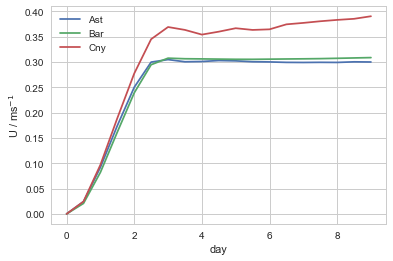

In [8]:
xind = 100

yslice_A = slice(130,230)
zslice_A = slice(12,16)

yslice_B = slice(130,160)
zslice_B = slice(28,32)

yslice_C = slice(225,260)
zslice_C = slice(12,16)


UAst = ((stAst.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')
UBar = ((stBar.U.isel(Z=zslice_B,Xp1=xind,Y=yslice_B)).mean(dim='Z')).mean(dim='Y')
UCny = ((stCny.U.isel(Z=zslice_C,Xp1=xind,Y=yslice_C)).mean(dim='Z')).mean(dim='Y')

fig, (ax0) = plt.subplots(1,1, figsize=(6,4))

ax0.plot(np.arange(19)/2.,UAst, label='Ast')
ax0.plot(np.arange(19)/2.,UBar, label='Bar')
ax0.plot(np.arange(19)/2.,UCny, label='Cny')

ax0.set_ylabel( 'U / ms$^{-1}$')
ax0.set_xlabel('day')
ax0.legend(loc=0)

### Incoming current over the shelf (not only canyon)

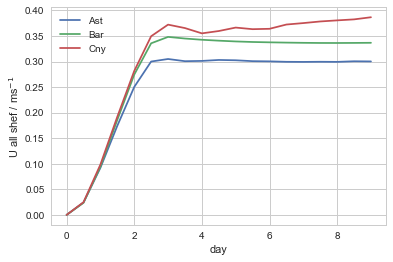

In [10]:
xind = 100

yslice_A = slice(130,230)
zslice_A = slice(12,16)

yslice_B = slice(130,230)
zslice_B = slice(13,17)

yslice_C = slice(225,275)
zslice_C = slice(12,16)


UAst = ((stAst.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')
UBar = ((stBar.U.isel(Z=zslice_B,Xp1=xind,Y=yslice_B)).mean(dim='Z')).mean(dim='Y')
UCny = ((stCny.U.isel(Z=zslice_C,Xp1=xind,Y=yslice_C)).mean(dim='Z')).mean(dim='Y')

fig, (ax0) = plt.subplots(1,1, figsize=(6,4))

ax0.plot(np.arange(19)/2.,UAst, label='Ast')
ax0.plot(np.arange(19)/2.,UBar, label='Bar')
ax0.plot(np.arange(19)/2.,UCny, label='Cny')

ax0.set_ylabel( 'U all shef / ms$^{-1}$')
ax0.set_xlabel('day')
ax0.legend(loc=0)

## V

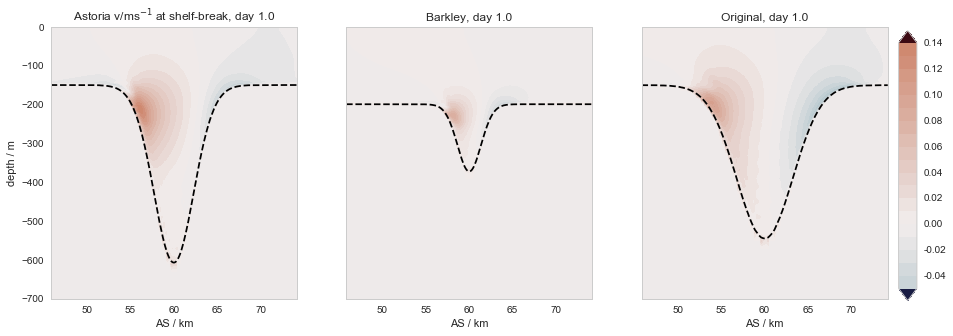

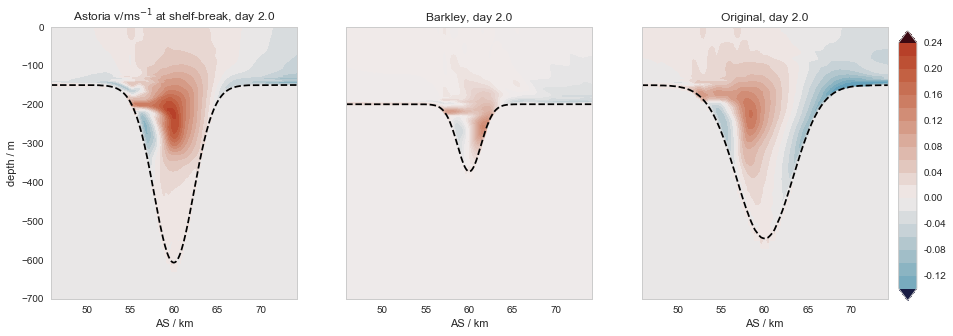

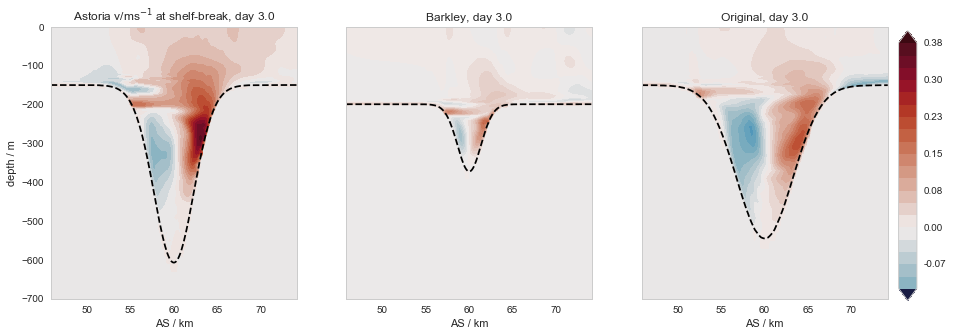

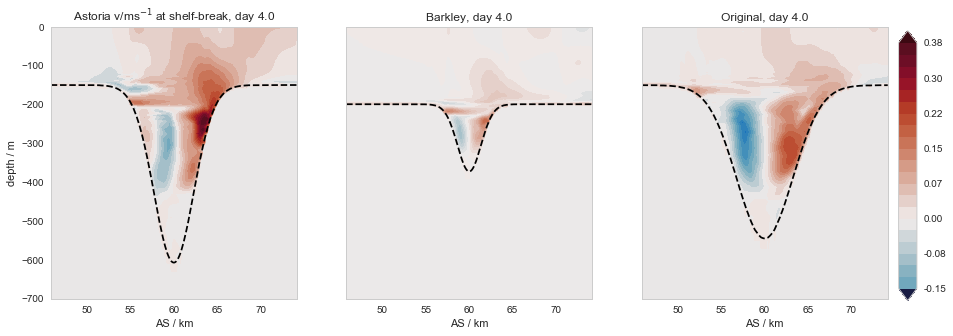

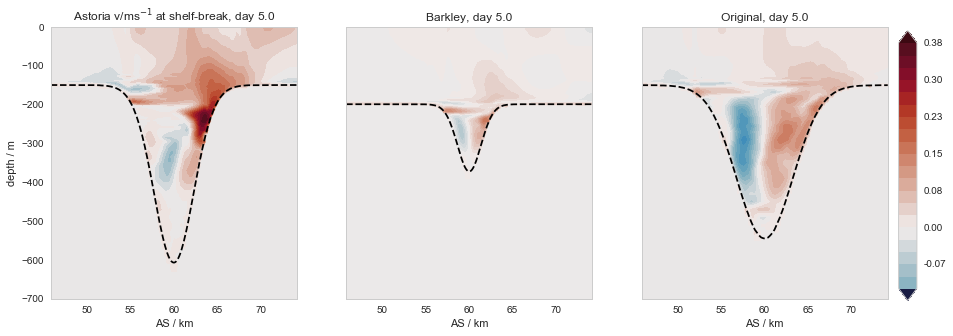

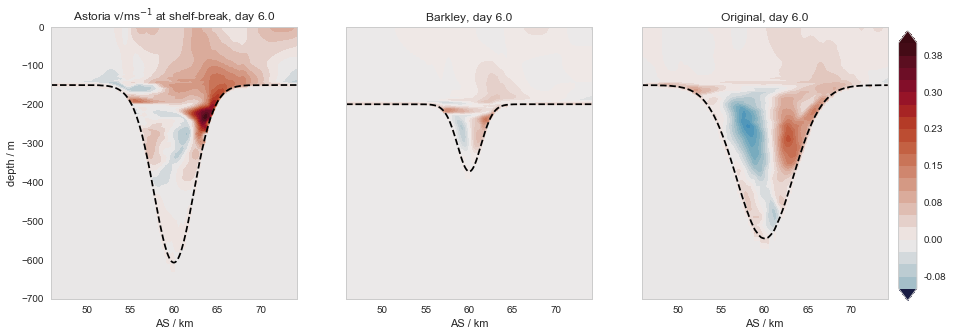

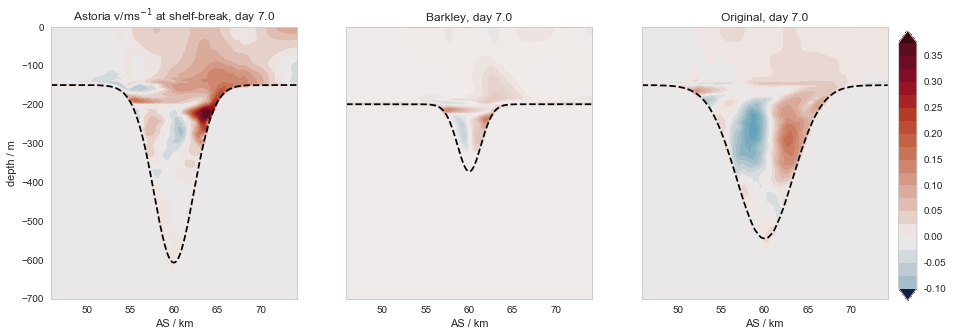

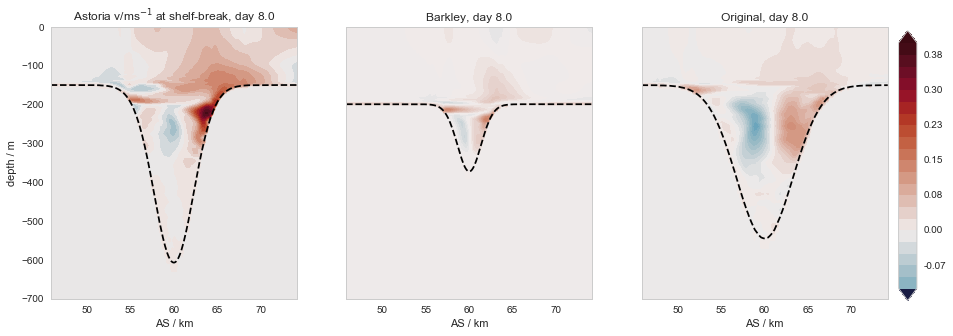

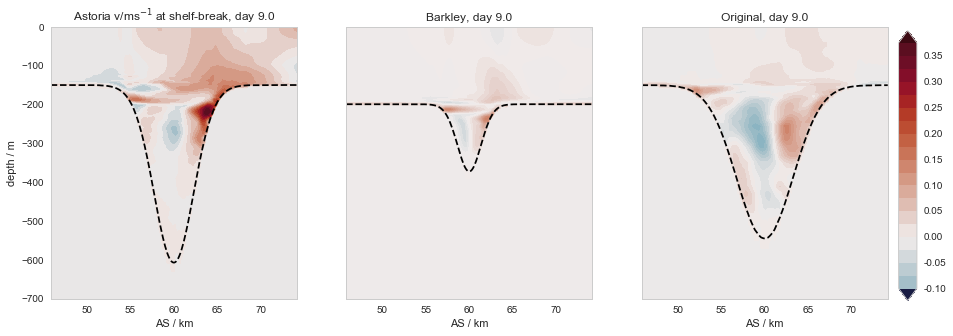

In [9]:
yind_Ast = 130
yind_Bar = 130
yind_Cny = 225

xslice = slice(100,260)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    VAst = stAst.V.isel(T=tt,Yp1=yind_Ast,X=xslice)
    VBar = stBar.V.isel(T=tt,Yp1=yind_Bar,X=xslice)
    VCny = stCny.V.isel(T=tt,Yp1=yind_Cny,X=xslice)

    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh = ax0.contourf(gridAst.X[xslice]/1000, gridAst.RC, VAst,20, 
                        cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4, extend='both')
    ax0.plot(gridAst.X[xslice]/1000, -gridAst.Depth[yind_Ast,xslice],'k--')
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_ylim(-700,0)
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')

    ax1.contourf(gridBar.X[xslice]/1000, gridBar.RC, VBar,20, cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4)
    ax1.plot(gridBar.X[xslice]/1000, -gridBar.Depth[yind_Bar,xslice],'k--')
    ax1.set_xlabel('AS / km')
    ax1.set_ylim(-700,0)
    
    ax2.contourf(gridCny.X[xslice]/1000, gridCny.RC, VCny,20, cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4)
    ax2.plot(gridCny.X[xslice]/1000, -gridCny.Depth[yind_Cny,xslice],'k--')
    ax2.set_xlabel('AS / km')
    ax2.set_ylim(-700,0)
    
    ax0.set_title(r'Astoria v/ms$^{-1}$ at shelf-break, day %1.1f' %(tt/2))
    ax1.set_title('Barkley, day %1.1f' %(tt/2))
    ax2.set_title('Original, day %1.1f' %(tt/2))

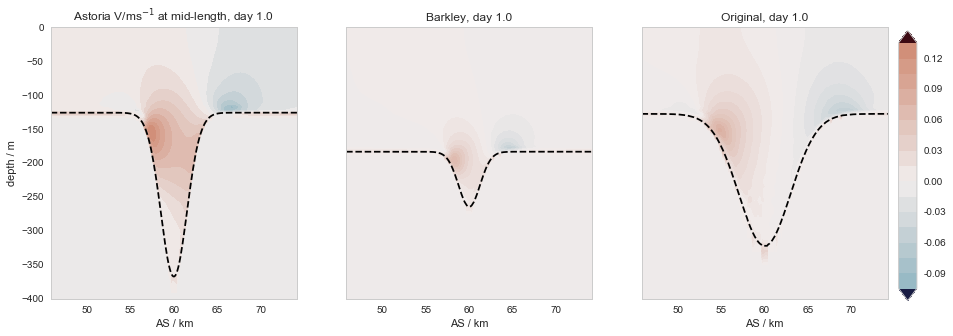

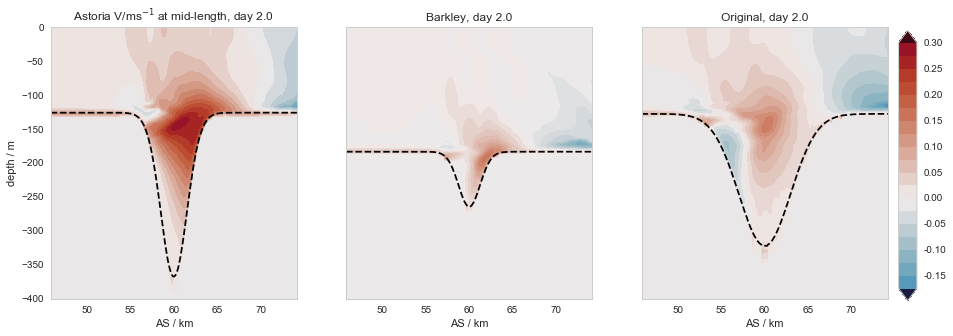

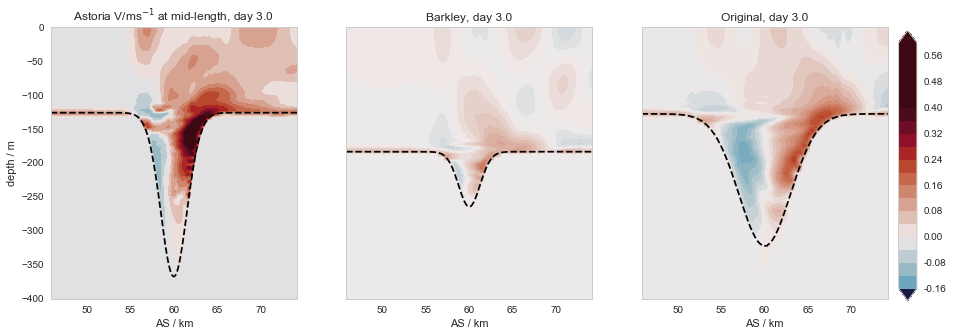

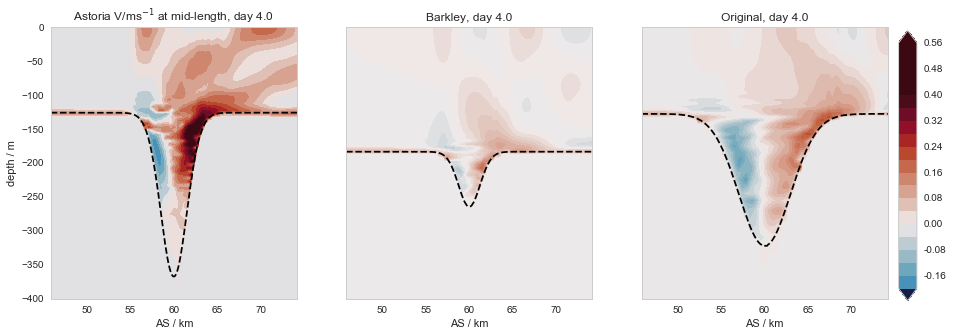

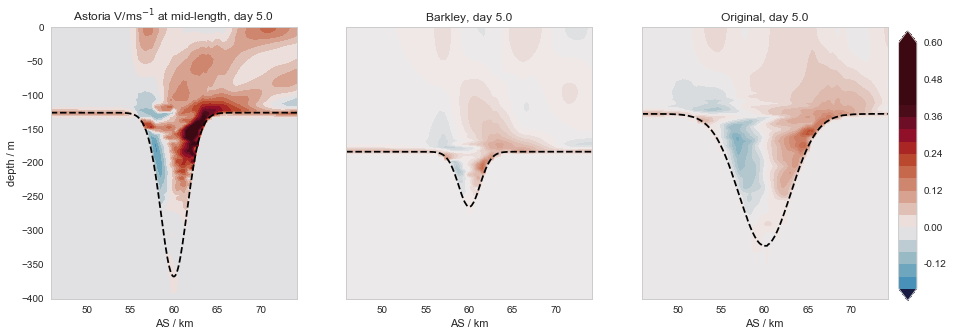

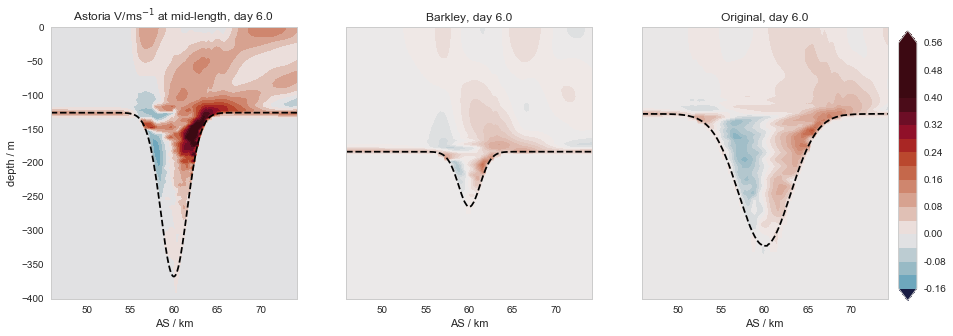

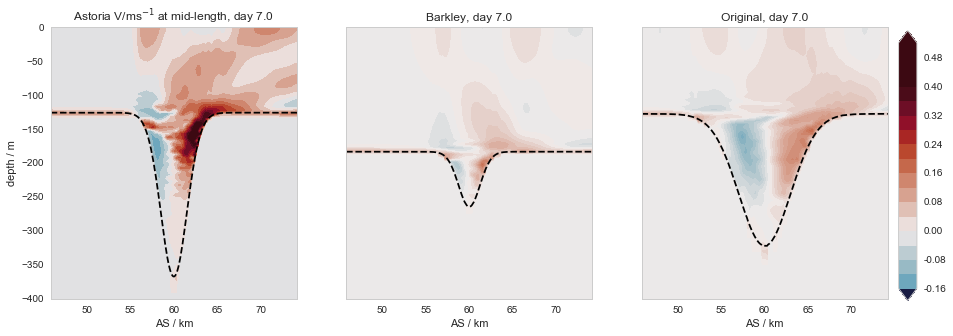

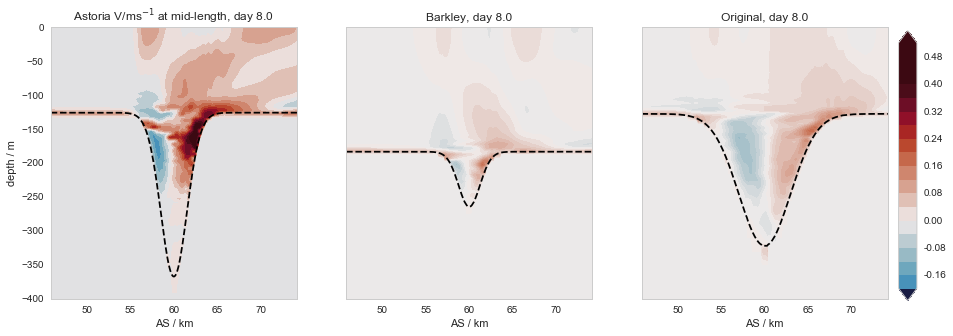

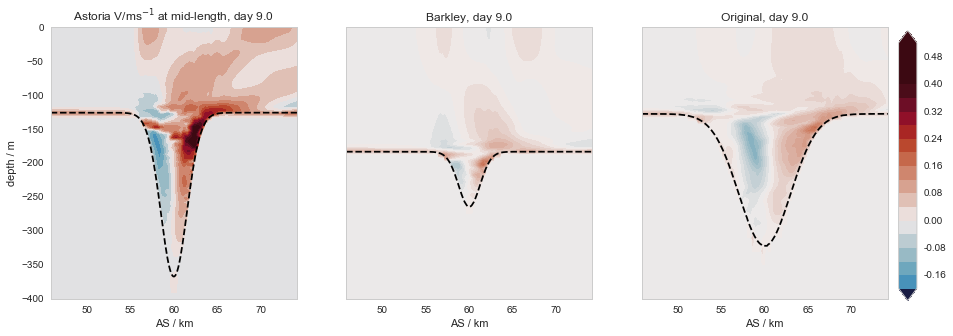

In [10]:
yind_Ast = 182
yind_Bar = 145
yind_Cny = 245

xslice = slice(100,260)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    VAst = stAst.V.isel(T=tt,Yp1=yind_Ast,X=xslice)
    VBar = stBar.V.isel(T=tt,Yp1=yind_Bar,X=xslice)
    VCny = stCny.V.isel(T=tt,Yp1=yind_Cny,X=xslice)

    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh = ax0.contourf(gridAst.X[xslice]/1000, gridAst.RC, VAst,20, 
                 cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4, extend='both')
    ax0.plot(gridAst.X[xslice]/1000, -gridAst.Depth[yind_Ast,xslice],'k--')
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_ylim(-400,0)
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')

    ax1.contourf(gridBar.X[xslice]/1000, gridBar.RC, VBar,20, cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4)
    ax1.plot(gridBar.X[xslice]/1000, -gridBar.Depth[yind_Bar,xslice],'k--')
    ax1.set_xlabel('AS / km')
    ax1.set_ylim(-400,0)
    
    ax2.contourf(gridCny.X[xslice]/1000, gridCny.RC, VCny,20, cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4)
    ax2.plot(gridCny.X[xslice]/1000, -gridCny.Depth[yind_Cny,xslice],'k--')
    ax2.set_xlabel('AS / km')
    ax2.set_ylim(-400,0)
    
    ax0.set_title(r'Astoria V/ms$^{-1}$ at mid-length, day %1.1f' %(tt/2))
    ax1.set_title('Barkley, day %1.1f' %(tt/2))
    ax2.set_title('Original, day %1.1f' %(tt/2))

Text(0.5,1,'Original')

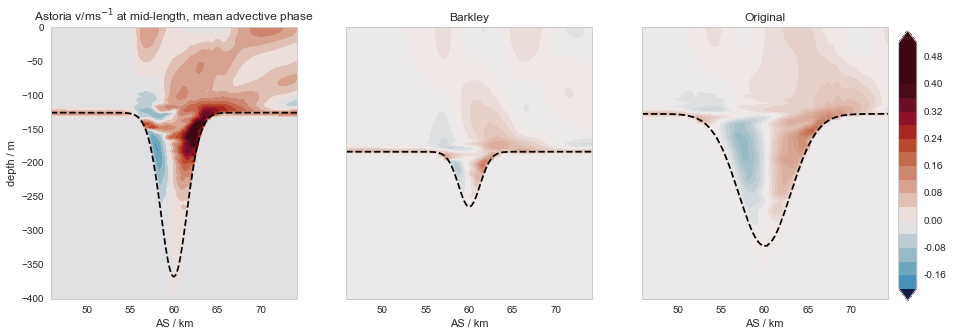

In [11]:
yind_Ast = 182
yind_Bar = 145
yind_Cny = 245

xslice = slice(100,260)
tslice = slice(8,20)

VAst = (stAst.V.isel(T=tslice,Yp1=yind_Ast,X=xslice)).mean(dim='T')
VBar = (stBar.V.isel(T=tslice,Yp1=yind_Bar,X=xslice)).mean(dim='T')
VCny = (stCny.V.isel(T=tslice,Yp1=yind_Cny,X=xslice)).mean(dim='T')

fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

mesh = ax0.contourf(gridAst.X[xslice]/1000, gridAst.RC, VAst,20,
                    cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4, extend='both')
ax0.plot(gridAst.X[xslice]/1000, -gridAst.Depth[yind_Ast,xslice],'k--')
ax0.set_ylabel('depth / m')
ax0.set_xlabel('AS / km')
ax0.set_ylim(-400,0)
cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')

ax1.contourf(gridBar.X[xslice]/1000, gridBar.RC, VBar,20, cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4)
ax1.plot(gridBar.X[xslice]/1000, -gridBar.Depth[yind_Bar,xslice],'k--')
ax1.set_xlabel('AS / km')
ax1.set_ylim(-400,0)

ax2.contourf(gridCny.X[xslice]/1000, gridCny.RC, VCny,20, cmap=cmo.cm.balance, vmin=-0.4, vmax=0.4)
ax2.plot(gridCny.X[xslice]/1000, -gridCny.Depth[yind_Cny,xslice],'k--')
ax2.set_xlabel('AS / km')
ax2.set_ylim(-400,0)

ax0.set_title('Astoria v/ms$^{-1}$ at mid-length, mean advective phase')
ax1.set_title('Barkley')
ax2.set_title('Original' )

## W

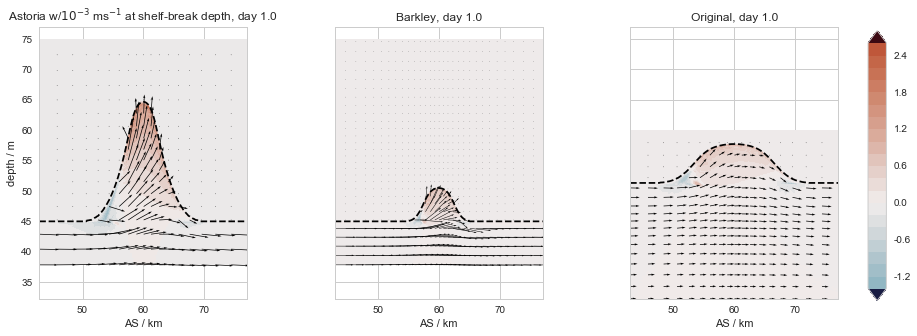

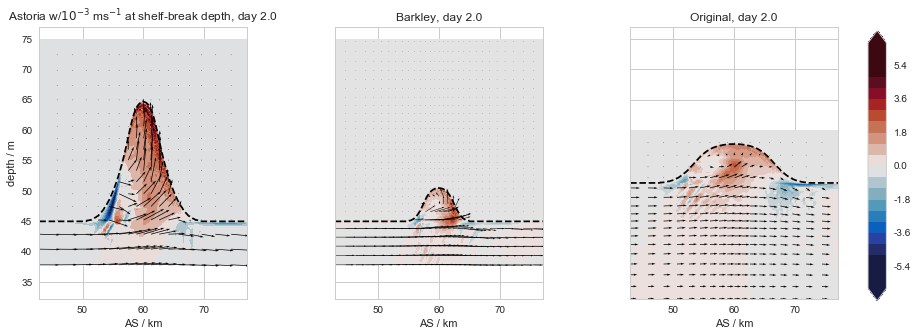

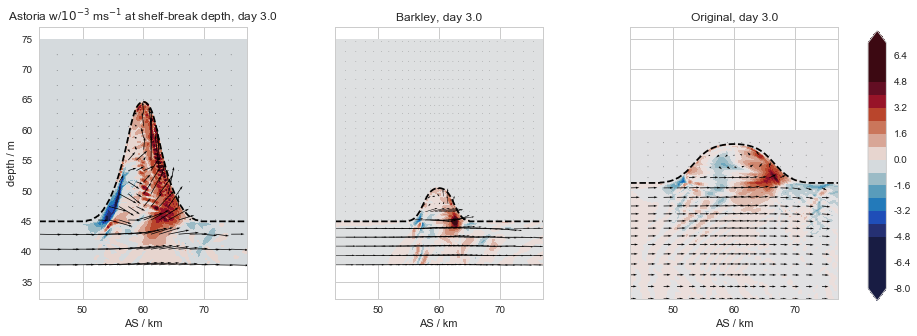

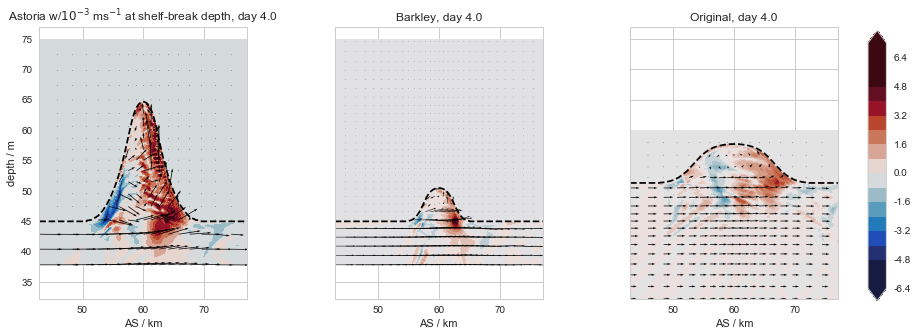

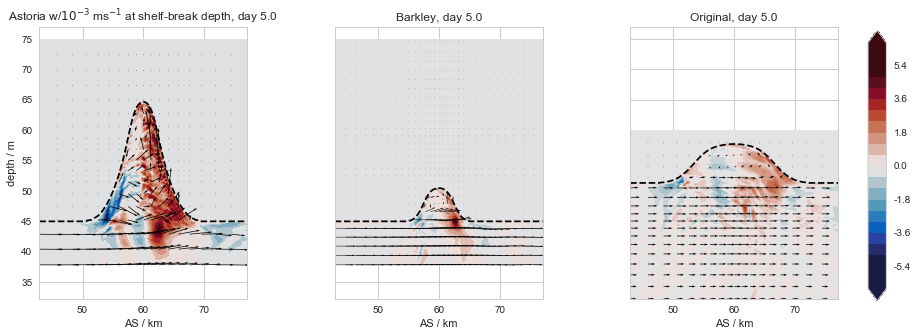

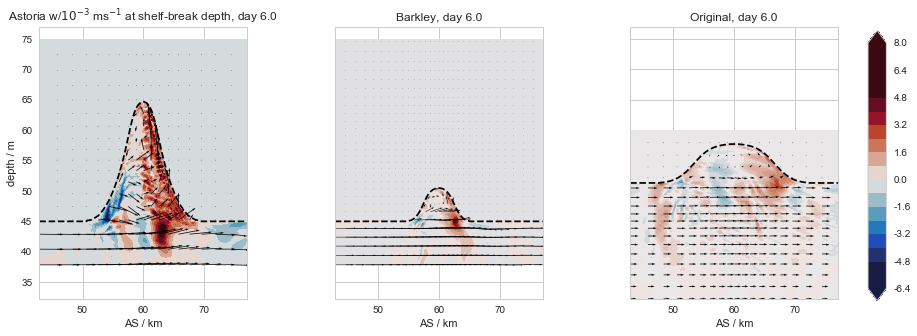

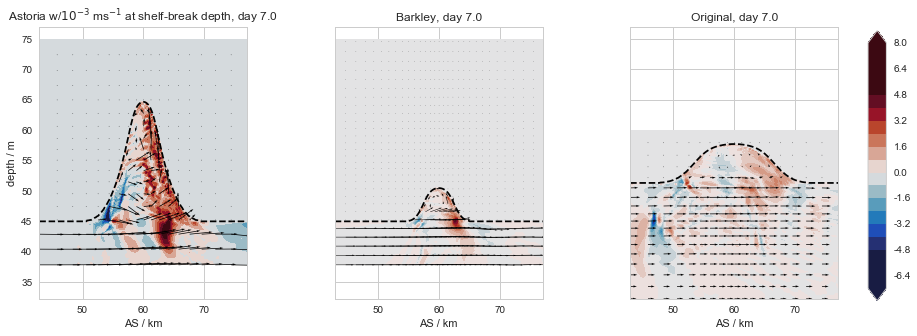

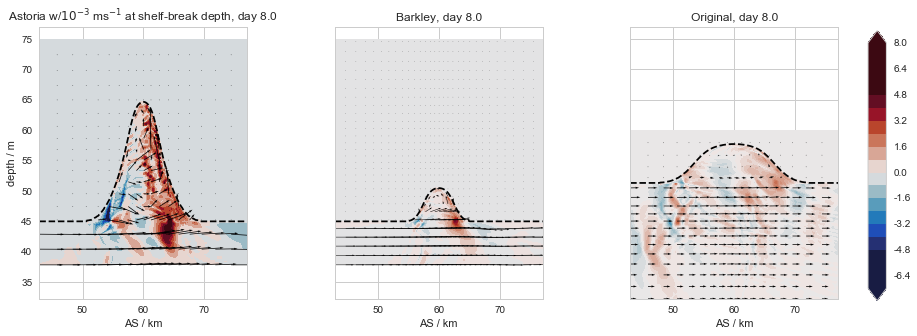

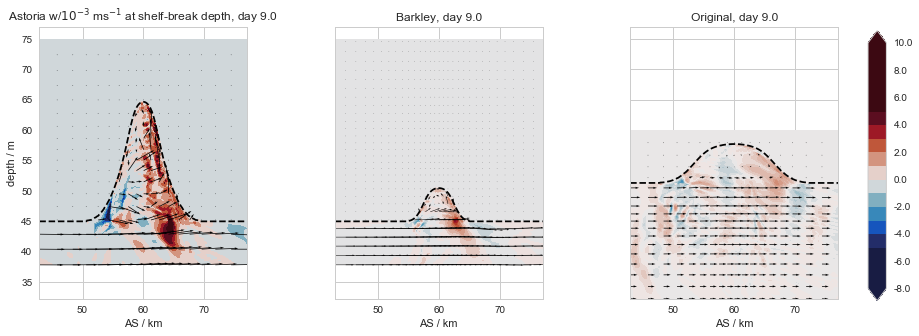

In [12]:
zind_Ast = 30
zind_Bar = 40
zind_Cny = 30

xslice = slice(90,270)
yslice = slice(100,270)

xslice_uns = slice(90,271)
yslice_uns = slice(100,271)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    WAst = stAst.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    WBar = stBar.W.isel(T=tt,Zl=zind_Bar,Y=yslice,X=xslice)
    WCny = stCny.W.isel(T=tt,Zl=zind_Cny,Y=yslice,X=xslice)
    
    U1 = stAst.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    U2 = stBar.U.isel(T=tt,Z=zind_Bar,Y=yslice,Xp1=xslice_uns)
    U3 = stCny.U.isel(T=tt,Z=zind_Cny,Y=yslice,Xp1=xslice_uns)

    V1 = stAst.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    V2 = stBar.V.isel(T=tt,Z=zind_Bar,Yp1=yslice_uns,X=xslice)
    V3 = stCny.V.isel(T=tt,Z=zind_Cny,Yp1=yslice_uns,X=xslice)

    UAst,VAst = rout.unstagger(U1,V1)
    UBar,VBar = rout.unstagger(U2,V2)
    UCny,VCny = rout.unstagger(U3,V3)
    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh=ax0.contourf(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, WAst*1E3,20, 
                      cmap=cmo.cm.balance,vmin=-5, vmax=5, extend='both')
    ax0.contour(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,xslice],
                [gridAst.Zl[zind_Ast]],colors='k')
    ax0.quiver(gridAst.X[xslice][::10]/1000, gridAst.Y[yslice][::10]/1000, UAst[::10,::10], VAst[::10,::10])
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_aspect(1)
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%1.1f')

    ax1.contourf(gridBar.X[xslice]/1000, gridBar.Y[yslice]/1000, WBar*1E3,20, cmap=cmo.cm.balance, vmin=-5, vmax=5)
    ax1.set_xlabel('AS / km')
    ax1.contour(gridBar.X[xslice]/1000, gridBar.Y[yslice]/1000, -gridBar.Depth[yslice,xslice],
                [gridBar.Zl[zind_Bar]],colors='k')
    ax1.quiver(gridBar.X[xslice][::6]/1000, gridBar.Y[yslice][::6]/1000, UBar[::6,::6], VBar[::6,::6])
    ax1.set_aspect(1)
    
    ax2.contourf(gridCny.X[xslice]/1000, gridCny.Y[yslice]/1000, WCny*1E3,20, cmap=cmo.cm.balance, vmin=-5, vmax=5)
    ax2.contour(gridCny.X[xslice]/1000, gridCny.Y[yslice]/1000, -gridCny.Depth[yslice,xslice],
                [gridCny.Zl[zind_Cny]],colors='k')
    ax2.set_xlabel('AS / km')
    ax2.quiver(gridCny.X[xslice][::10]/1000, gridCny.Y[yslice][::10]/1000, UCny[::10,::10], VCny[::10,::10])
    ax2.set_aspect(1)
    
    ax0.set_title('Astoria w/$10^{-3}$ ms$^{-1}$ at shelf-break depth, day %1.1f' %(tt/2))
    ax1.set_title('Barkley, day %1.1f' %(tt/2))
    ax2.set_title('Original, day %1.1f' %(tt/2))

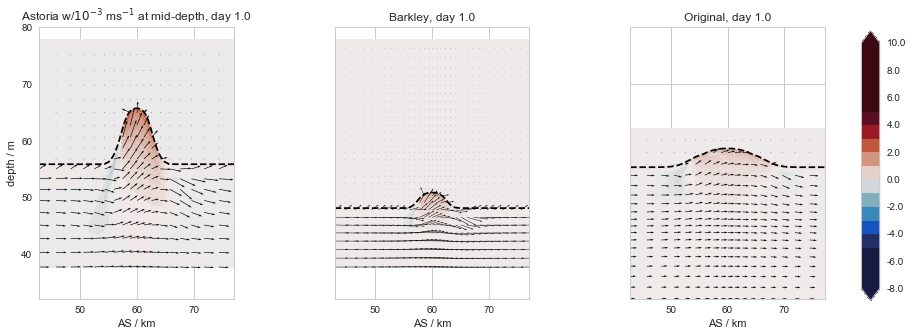

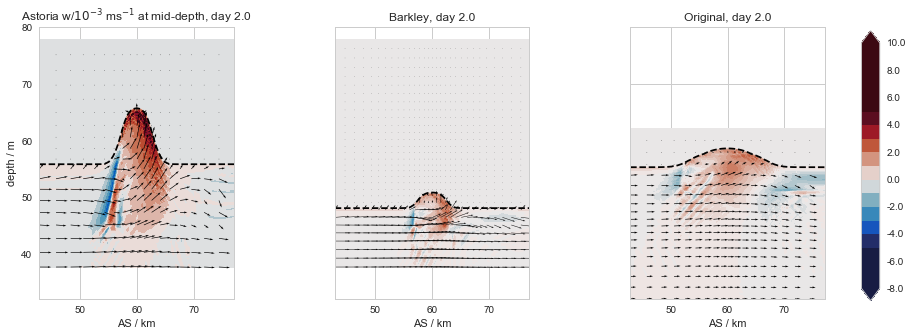

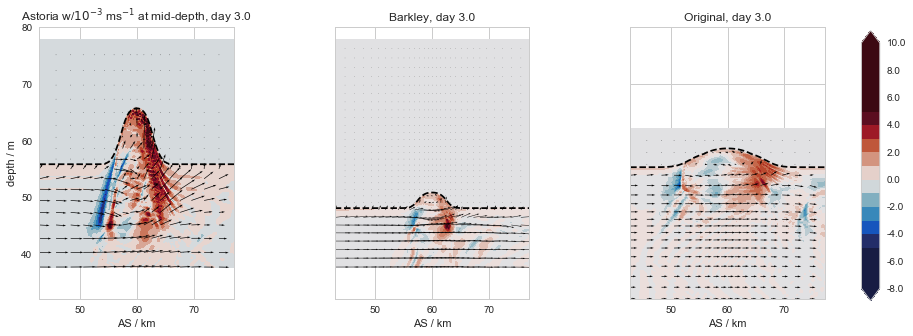

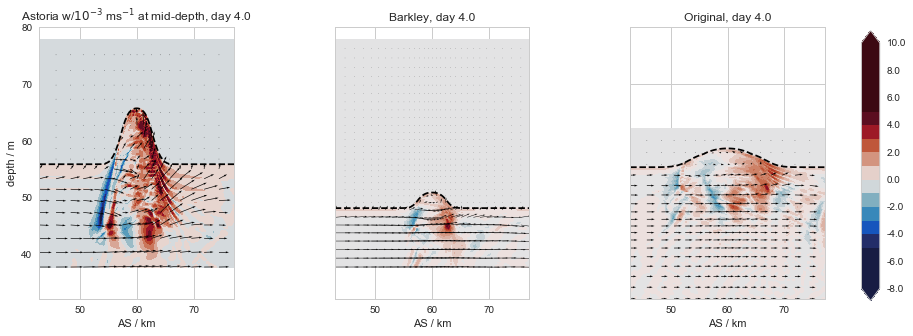

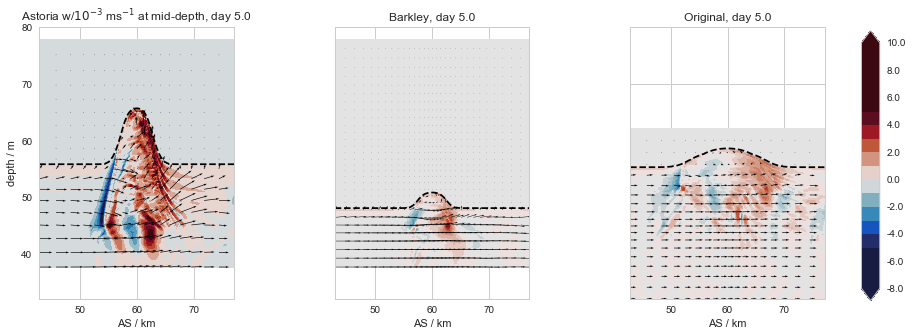

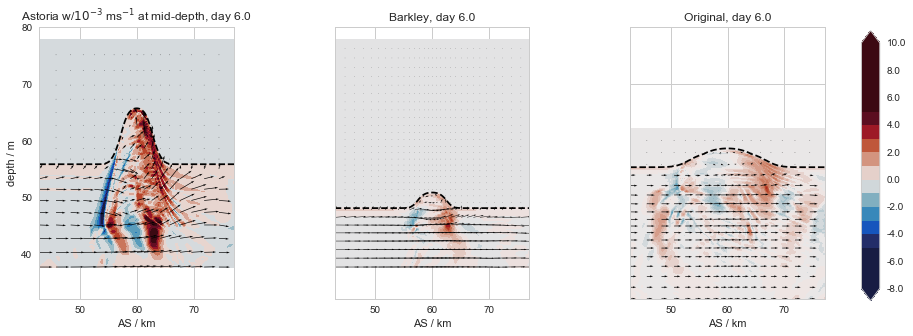

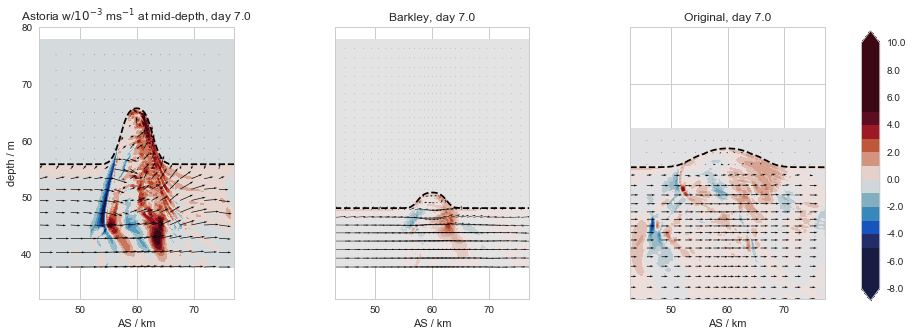

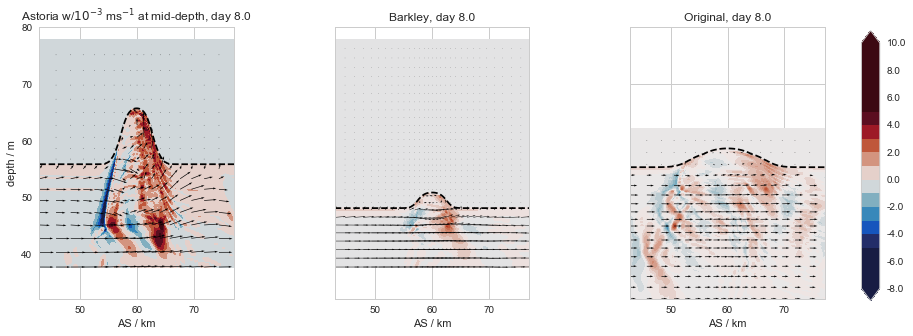

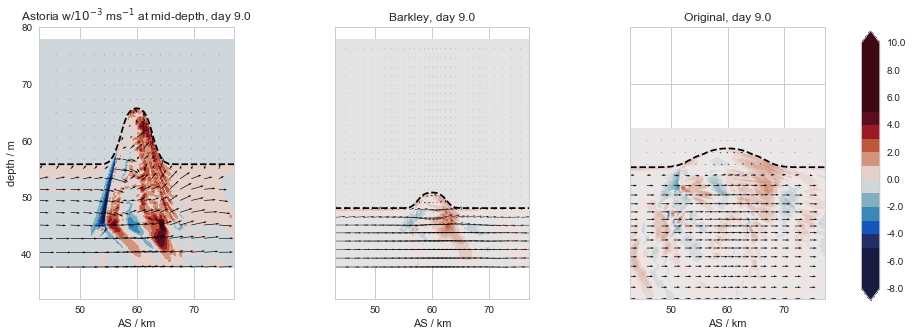

In [13]:
zind_Ast = 25
zind_Bar = 37
zind_Cny = 25

xslice = slice(90,270)
yslice = slice(100,280)

xslice_uns = slice(90,271)
yslice_uns = slice(100,281)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    WAst = stAst.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    WBar = stBar.W.isel(T=tt,Zl=zind_Bar,Y=yslice,X=xslice)
    WCny = stCny.W.isel(T=tt,Zl=zind_Cny,Y=yslice,X=xslice)
    
    U1 = stAst.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    U2 = stBar.U.isel(T=tt,Z=zind_Bar,Y=yslice,Xp1=xslice_uns)
    U3 = stCny.U.isel(T=tt,Z=zind_Cny,Y=yslice,Xp1=xslice_uns)

    V1 = stAst.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    V2 = stBar.V.isel(T=tt,Z=zind_Bar,Yp1=yslice_uns,X=xslice)
    V3 = stCny.V.isel(T=tt,Z=zind_Cny,Yp1=yslice_uns,X=xslice)

    UAst,VAst = rout.unstagger(U1,V1)
    UBar,VBar = rout.unstagger(U2,V2)
    UCny,VCny = rout.unstagger(U3,V3)
    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    ax0.contourf(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, WAst*1E3,20,
                 cmap=cmo.cm.balance,vmin=-5, vmax=5)
    ax0.contour(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,xslice],
                [gridAst.Zl[zind_Ast]],colors='k')
    ax0.quiver(gridAst.X[xslice][::10]/1000, gridAst.Y[yslice][::10]/1000, UAst[::10,::10], VAst[::10,::10])
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_aspect(1)
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%1.1f')

    ax1.contourf(gridBar.X[xslice]/1000, gridBar.Y[yslice]/1000, WBar*1E3,20,
                 cmap=cmo.cm.balance, vmin=-5, vmax=5)
    ax1.set_xlabel('AS / km')
    ax1.contour(gridBar.X[xslice]/1000, gridBar.Y[yslice]/1000, -gridBar.Depth[yslice,xslice],
                [gridBar.Zl[zind_Bar]],colors='k')
    ax1.quiver(gridBar.X[xslice][::6]/1000, gridBar.Y[yslice][::6]/1000, UBar[::6,::6], VBar[::6,::6])
    ax1.set_aspect(1)
    
    ax2.contourf(gridCny.X[xslice]/1000, gridCny.Y[yslice]/1000, WCny*1E3,20,
                 cmap=cmo.cm.balance, vmin=-5, vmax=5)
    ax2.contour(gridCny.X[xslice]/1000, gridCny.Y[yslice]/1000, -gridCny.Depth[yslice,xslice],
                [gridCny.Zl[zind_Cny]],colors='k')
    ax2.set_xlabel('AS / km')
    ax2.quiver(gridCny.X[xslice][::10]/1000, gridCny.Y[yslice][::10]/1000, UCny[::10,::10], VCny[::10,::10])
    ax2.set_aspect(1)
    
    ax0.set_title('Astoria w/$10^{-3}$ ms$^{-1}$ at mid-depth, day %1.1f' %(tt/2))
    ax1.set_title('Barkley, day %1.1f' %(tt/2))
    ax2.set_title('Original, day %1.1f' %(tt/2))

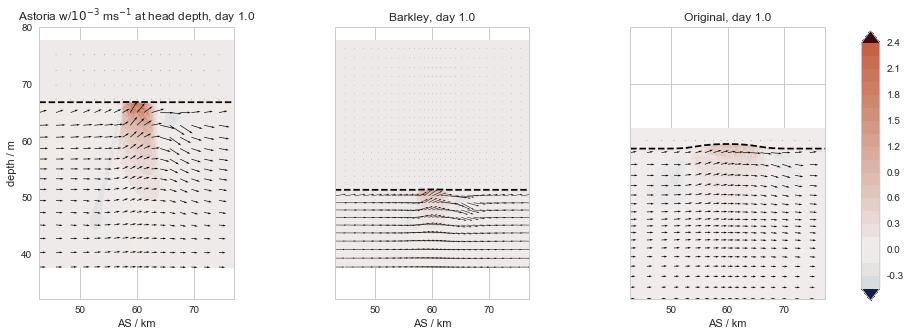

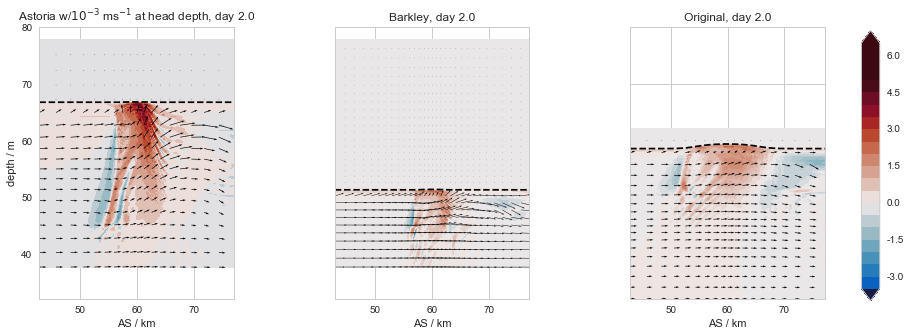

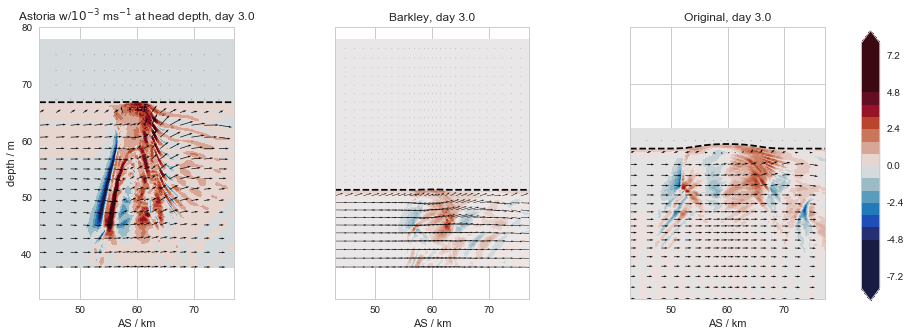

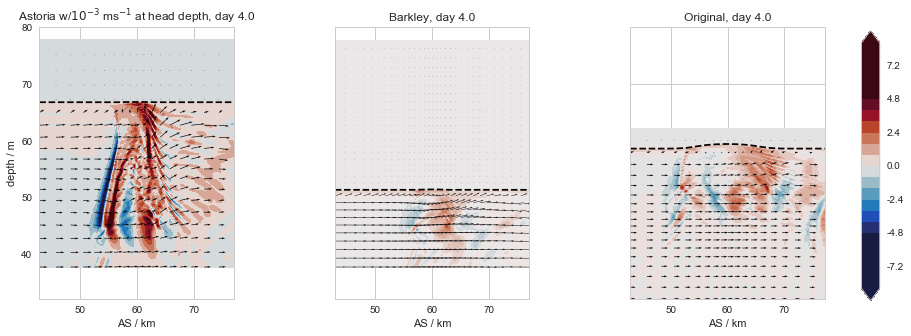

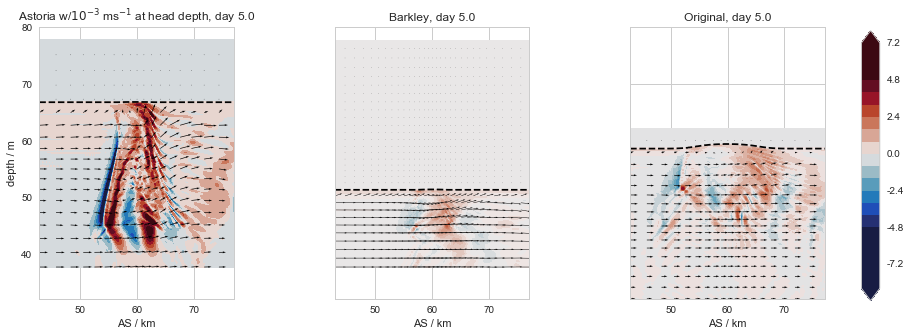

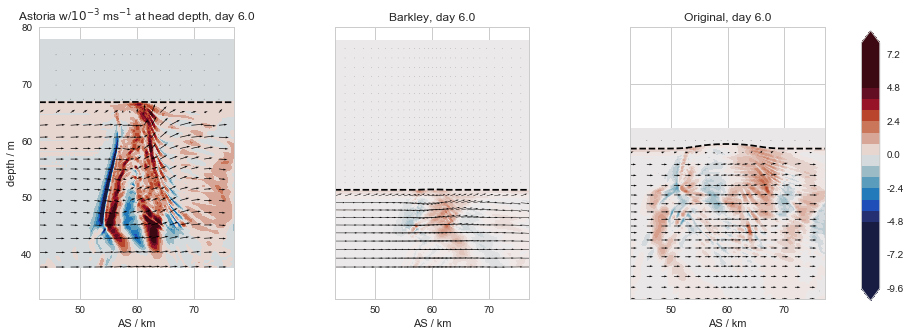

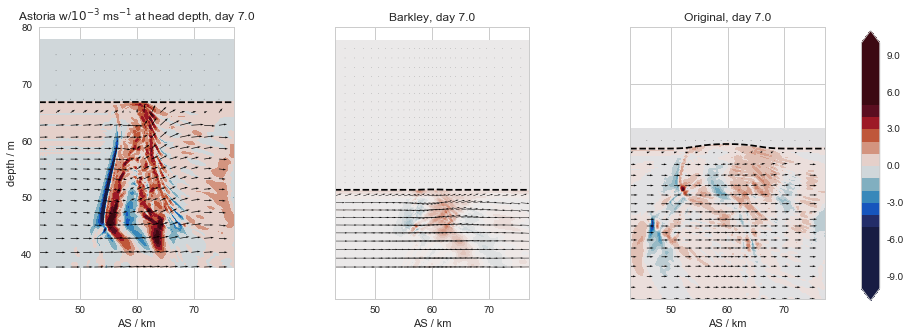

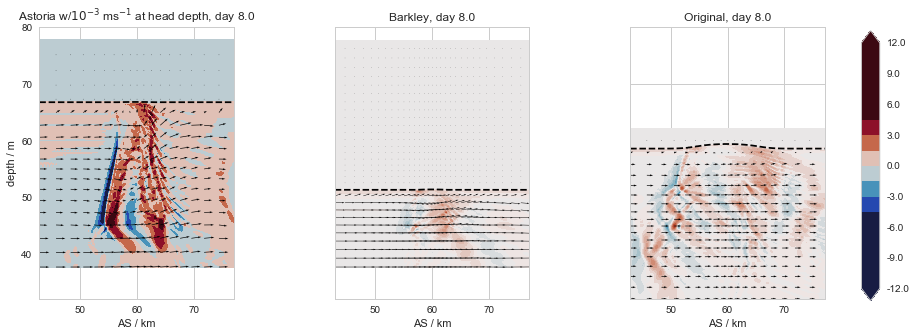

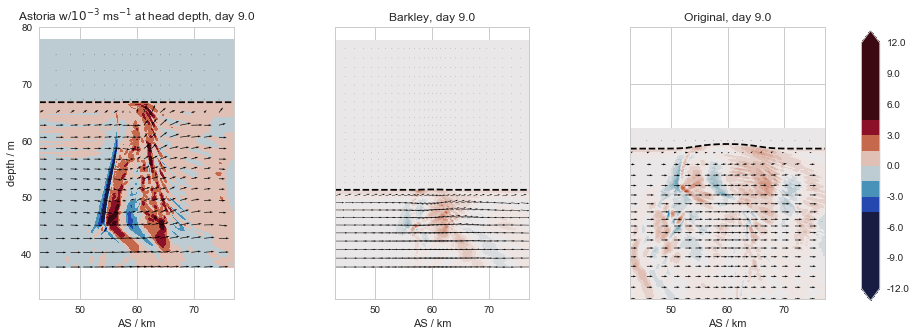

In [14]:
zind_Ast = 20
zind_Bar = 34
zind_Cny = 21

xslice = slice(90,270)
yslice = slice(100,280)

xslice_uns = slice(90,271)
yslice_uns = slice(100,281)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    WAst = stAst.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    WBar = stBar.W.isel(T=tt,Zl=zind_Bar,Y=yslice,X=xslice)
    WCny = stCny.W.isel(T=tt,Zl=zind_Cny,Y=yslice,X=xslice)
    
    U1 = stAst.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    U2 = stBar.U.isel(T=tt,Z=zind_Bar,Y=yslice,Xp1=xslice_uns)
    U3 = stCny.U.isel(T=tt,Z=zind_Cny,Y=yslice,Xp1=xslice_uns)

    V1 = stAst.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    V2 = stBar.V.isel(T=tt,Z=zind_Bar,Yp1=yslice_uns,X=xslice)
    V3 = stCny.V.isel(T=tt,Z=zind_Cny,Yp1=yslice_uns,X=xslice)

    UAst,VAst = rout.unstagger(U1,V1)
    UBar,VBar = rout.unstagger(U2,V2)
    UCny,VCny = rout.unstagger(U3,V3)
    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh = ax0.contourf(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, WAst*1E3,20, 
                        cmap=cmo.cm.balance,vmin=-5, vmax=5, extend='both')
    ax0.contour(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,xslice],
                [gridAst.Zl[zind_Ast]],colors='k')
    ax0.quiver(gridAst.X[xslice][::10]/1000, gridAst.Y[yslice][::10]/1000, UAst[::10,::10], VAst[::10,::10])
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_aspect(1)
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%1.1f')

    ax1.contourf(gridBar.X[xslice]/1000, gridBar.Y[yslice]/1000, WBar*1E3,20, 
                 cmap=cmo.cm.balance, vmin=-5, vmax=5)
    ax1.set_xlabel('AS / km')
    ax1.contour(gridBar.X[xslice]/1000, gridBar.Y[yslice]/1000, -gridBar.Depth[yslice,xslice],
                [gridBar.Zl[zind_Bar]],colors='k')
    ax1.quiver(gridBar.X[xslice][::6]/1000, gridBar.Y[yslice][::6]/1000, UBar[::6,::6], VBar[::6,::6])
    ax1.set_aspect(1)
    
    ax2.contourf(gridCny.X[xslice]/1000, gridCny.Y[yslice]/1000, WCny*1E3,20, cmap=cmo.cm.balance, vmin=-5, vmax=5)
    ax2.contour(gridCny.X[xslice]/1000, gridCny.Y[yslice]/1000, -gridCny.Depth[yslice,xslice],
                [gridCny.Zl[zind_Cny]],colors='k')
    ax2.set_xlabel('AS / km')
    ax2.quiver(gridCny.X[xslice][::10]/1000, gridCny.Y[yslice][::10]/1000, UCny[::10,::10], VCny[::10,::10])
    ax2.set_aspect(1)
    
    ax0.set_title('Astoria w/$10^{-3}$ ms$^{-1}$ at head depth, day %1.1f' %(tt/2))
    ax1.set_title('Barkley, day %1.1f' %(tt/2))
    ax2.set_title('Original, day %1.1f' %(tt/2))

/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


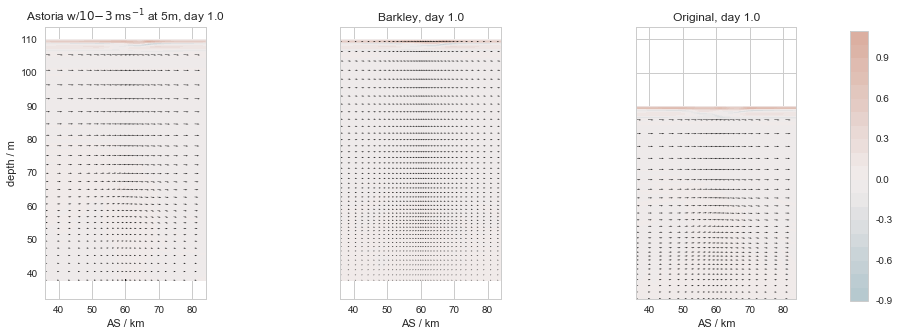

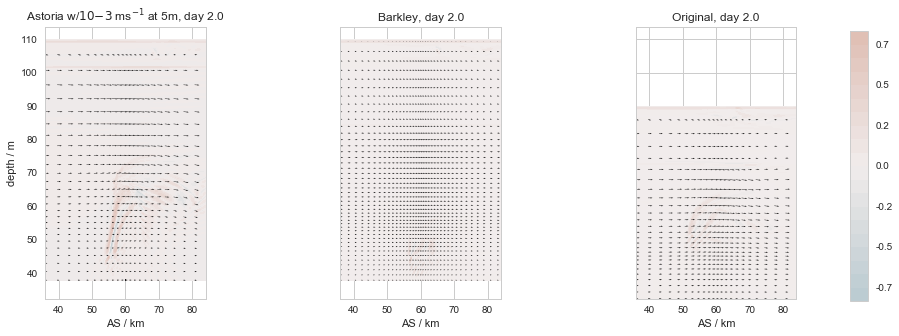

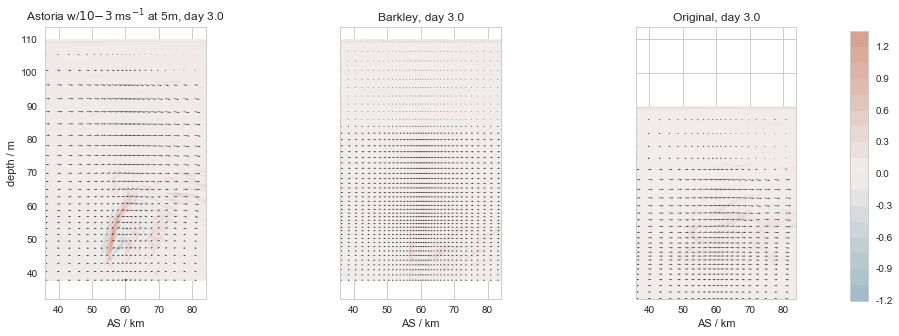

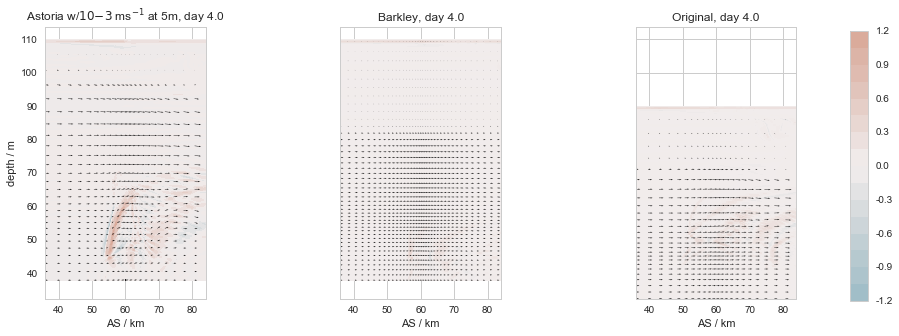

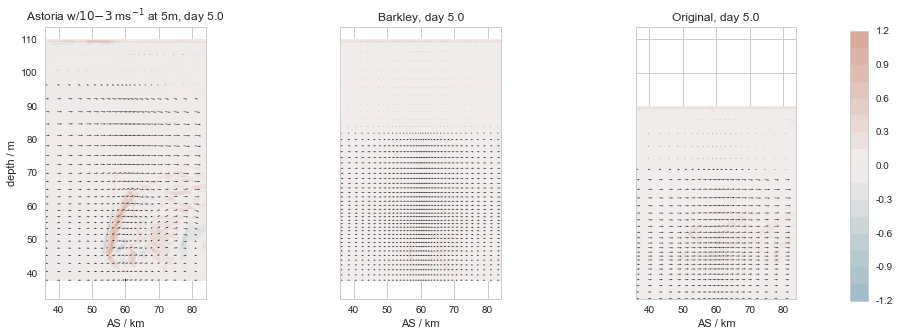

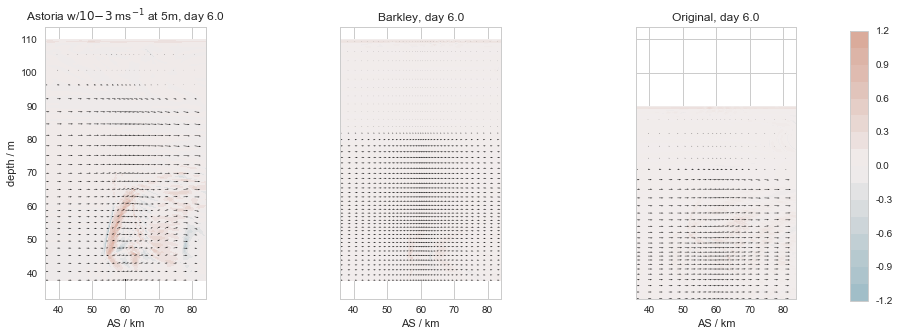

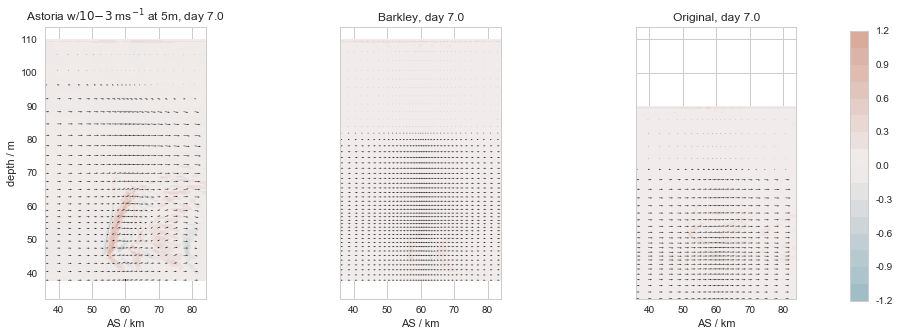

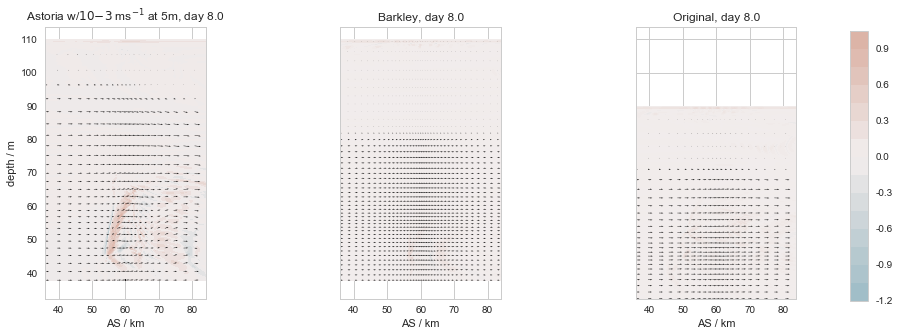

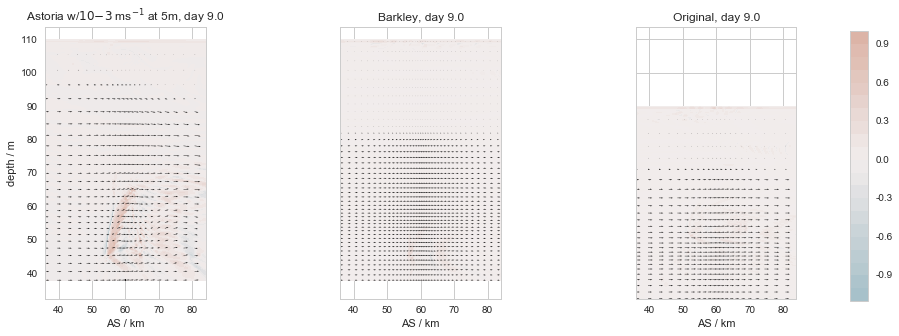

In [15]:
zind_Ast = 1
zind_Bar = 1
zind_Cny = 1

xslice = slice(70,290)
yslice = slice(100,360)

xslice_uns = slice(70,291)
yslice_uns = slice(100,361)

for tt in [2,4,6,8,10,12,14,16,18]:
    
    WAst = stAst.W.isel(T=tt,Zl=zind_Ast,Y=yslice,X=xslice)
    WBar = stBar.W.isel(T=tt,Zl=zind_Bar,Y=yslice,X=xslice)
    WCny = stCny.W.isel(T=tt,Zl=zind_Cny,Y=yslice,X=xslice)
    
    U1 = stAst.U.isel(T=tt,Z=zind_Ast,Y=yslice,Xp1=xslice_uns)
    U2 = stBar.U.isel(T=tt,Z=zind_Bar,Y=yslice,Xp1=xslice_uns)
    U3 = stCny.U.isel(T=tt,Z=zind_Cny,Y=yslice,Xp1=xslice_uns)

    V1 = stAst.V.isel(T=tt,Z=zind_Ast,Yp1=yslice_uns,X=xslice)
    V2 = stBar.V.isel(T=tt,Z=zind_Bar,Yp1=yslice_uns,X=xslice)
    V3 = stCny.V.isel(T=tt,Z=zind_Cny,Yp1=yslice_uns,X=xslice)

    UAst,VAst = rout.unstagger(U1,V1)
    UBar,VBar = rout.unstagger(U2,V2)
    UCny,VCny = rout.unstagger(U3,V3)
    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3, figsize=(15,5), sharey = True)

    mesh = ax0.contourf(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, WAst*1E3,20, 
                        cmap=cmo.cm.balance,vmin=-5, vmax=5)
    ax0.contour(gridAst.X[xslice]/1000, gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,xslice],
                [gridAst.Zl[zind_Ast]],colors='k')
    ax0.quiver(gridAst.X[xslice][::10]/1000, gridAst.Y[yslice][::10]/1000, UAst[::10,::10], VAst[::10,::10])
    ax0.set_ylabel('depth / m')
    ax0.set_xlabel('AS / km')
    ax0.set_aspect(1)
    cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
    cb=fig.colorbar(mesh, cax=cbar_ax, format='%1.1f')

    ax1.contourf(gridBar.X[xslice]/1000, gridBar.Y[yslice]/1000, WBar*1E3,20,
                 cmap=cmo.cm.balance, vmin=-5, vmax=5)
    ax1.set_xlabel('AS / km')
    ax1.contour(gridBar.X[xslice]/1000, gridBar.Y[yslice]/1000, -gridBar.Depth[yslice,xslice],
                [gridBar.Zl[zind_Bar]],colors='k')
    ax1.quiver(gridBar.X[xslice][::6]/1000, gridBar.Y[yslice][::6]/1000, UBar[::6,::6], VBar[::6,::6])
    ax1.set_aspect(1)
    
    ax2.contourf(gridCny.X[xslice]/1000, gridCny.Y[yslice]/1000, WCny*1E3,20, 
                 cmap=cmo.cm.balance, vmin=-5, vmax=5)
    ax2.contour(gridCny.X[xslice]/1000, gridCny.Y[yslice]/1000, -gridCny.Depth[yslice,xslice],
                [gridCny.Zl[zind_Cny]],colors='k')
    ax2.set_xlabel('AS / km')
    ax2.quiver(gridCny.X[xslice][::10]/1000, gridCny.Y[yslice][::10]/1000, UCny[::10,::10], VCny[::10,::10])
    ax2.set_aspect(1)
    
    ax0.set_title('Astoria w/$10{-3}$ ms$^{-1}$ at 5m, day %1.1f' %(tt/2))
    ax1.set_title('Barkley, day %1.1f' %(tt/2))
    ax2.set_title('Original, day %1.1f' %(tt/2))

### How much water upwells through each canyon?

In [23]:
f_Ast_bf2 = ('/data/kramosmu/results/TracerExperiments/UPW_8TR/HCW_TrMass_UPW_8TR_BF2_AST_01.csv')
f_Bar = ('/data/kramosmu/results/TracerExperiments/UPW_8TR_BF4_BAR/HCW_TrMass_Tr01_UPW_8TR_BF4_BAR_01.csv')
f_Cny = ('/data/kramosmu/results/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun38.csv')

df_Ast_bf2 = pd.read_csv(f_Ast_bf2)
HCW_Ast_bf2 = df_Ast_bf2['HCW']

df_Bar = pd.read_csv(f_Bar)
HCW_Bar = df_Bar['HCW']

df_Cny = pd.read_csv(f_Cny)
HCW_Cny = df_Cny['HCW']

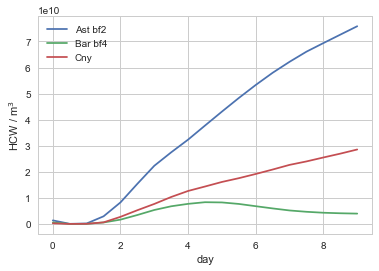

In [24]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(np.arange(19)/2, HCW_Ast_bf2, label='Ast bf2')
ax.plot(np.arange(19)/2, HCW_Bar, label='Bar bf4')
ax.plot(np.arange(19)/2, HCW_Cny, label='Cny')

ax.set_ylabel('HCW / m$^3$')
ax.set_xlabel('day')

ax.legend(loc=0)

No canyon cases

In [25]:
f_Ast_nc_bf2 = ('/data/kramosmu/results/TracerExperiments/UPW_8TR/HCW_TrMass_UPW_8TR_BF2_AST_02.csv')
f_Bar_nc = ('/data/kramosmu/results/TracerExperiments/UPW_8TR_BF4_BAR/HCW_TrMass_Tr01_UPW_8TR_BF4_BAR_02.csv')
f_Cny_nc = ('/data/kramosmu/results/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun42.csv')

df_Ast_nc_bf2 = pd.read_csv(f_Ast_nc_bf2)
HCW_Ast_nc_bf2 = df_Ast_nc_bf2['HCW']

df_Bar_nc = pd.read_csv(f_Bar_nc)
HCW_Bar_nc = df_Bar_nc['HCW']

df_Cny_nc = pd.read_csv(f_Cny_nc)
HCW_Cny_nc = df_Cny_nc['HCW']

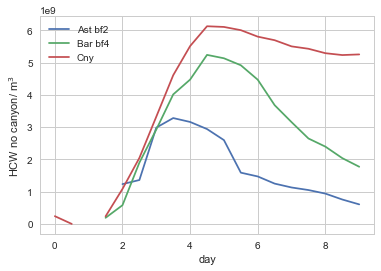

In [26]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(np.arange(19)/2, HCW_Ast_nc_bf2, label='Ast bf2')
ax.plot(np.arange(19)/2, HCW_Bar_nc, label='Bar bf4')
ax.plot(np.arange(19)/2, HCW_Cny_nc, label='Cny')

ax.set_ylabel('HCW no canyon/ m$^3$')
ax.set_xlabel('day')

ax.legend(loc=0)

Why is shelf-break upwelling larger for Cny than for Ast?

Consider that:
* U is smaller for Ast and Bar than for Cny.
* Advective tracer in Cny has Kv=$10^{-7}$ vs Kv=$10^{-5}$ in Ast and Bar, change this for next experiment.